In [6]:
from google.cloud import bigquery
bq = bigquery.Client(project='qwiklabs-gcp-02-8c6fad348f03')

In [7]:
query = """
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 5) AS arrival_delay_quantiles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
HAVING
  num_flights > 100
ORDER BY
  departure_delay ASC """

In [8]:
df =  bq.query(query).to_dataframe()
df.head(10)

,departure_delay,num_flights,arrival_delay_quantiles
0,-37.0,107,"[-66.0, -41.0, -30.0, -17.0, -3.0, 33.0]"
1,-36.0,139,"[-74.0, -39.0, -32.0, -18.0, -7.0, 49.0]"
2,-35.0,191,"[-68.0, -40.0, -28.0, -14.0, -4.0, 85.0]"
3,-34.0,195,"[-58.0, -40.0, -30.0, -19.0, -8.0, 39.0]"
4,-33.0,227,"[-59.0, -39.0, -32.0, -20.0, -7.0, 25.0]"
5,-32.0,277,"[-58.0, -38.0, -31.0, -22.0, -5.0, 124.0]"
6,-31.0,311,"[-58.0, -37.0, -31.0, -22.0, -7.0, 104.0]"
7,-30.0,658,"[-90.0, -37.0, -29.0, -18.0, -5.0, 80.0]"
8,-29.0,502,"[-53.0, -35.0, -29.0, -22.0, -6.0, 71.0]"
9,-28.0,648,"[-54.0, -34.0, -29.0, -21.0, -7.0, 72.0]"


In [10]:
import pandas as pd
percentiles = df['arrival_delay_quantiles'].apply(pd.Series)
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%
0,-37.0,-66.0,-41.0,-30.0,-17.0,-3.0,33.0
1,-36.0,-74.0,-39.0,-32.0,-18.0,-7.0,49.0
2,-35.0,-68.0,-40.0,-28.0,-14.0,-4.0,85.0
3,-34.0,-58.0,-40.0,-30.0,-19.0,-8.0,39.0
4,-33.0,-59.0,-39.0,-32.0,-20.0,-7.0,25.0


In [11]:
df.shape

(508, 7)

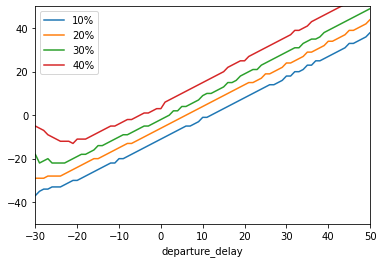

In [13]:
without_extremes = df.drop(['0%', '50%'], 1)
without_extremes.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));